<a name="top"></a>
<div style="width:1000 px">

<h2>ATM 652 Fall 2021, HW 2</h2>
"+Code" in upper-left-hand corner adds a cell intended to write code in.

"+Text" in upper-left-hand corner adds a cell just intended to write in.

run a code cell by clicking on the [ ] icon to the upper left of a code cell. a number will appear in it (if successful), letting you know the order in which the code cell was run relative to the other code cells.

double-click on a cell to edit it. delete a cell using the garbage icon in upper-right-hand corner.


### lab organization


1. <a href="#upperairdata">Obtain radiosonde data</a>
1. <a href="#simpleplot">Make a simple T, Td plot</a>
1. <a href="#winds">Repeat with winds</a>
1. <a href="#skewt">Make a Skew-T</a>
1. <a href="#fiduciallines">Adding fiducial lines and shading</a>
1. <a href="calculate_thermo">calculate related thermodynamic quantities</a>

the siphon and metpy utilities are not standard to colab so these need to be installed first. 

'Siphon' is a collection of Python utilities for downloading data from remote data services. 

'MetPy' is a modern meteorological toolkit for Python. It is a maintained project of Unidata (http://www.unidata.ucar.edu) to serve the academic meteorological community.

you may need to run the code cell twice.

In [1]:
!pip install siphon
from siphon.simplewebservice.wyoming import WyomingUpperAir
!pip install metpy
import metpy
from metpy.calc.thermo import *
from metpy.units import units

<a name="upperairdata"></a>
## Obtain upper air data

Upper air observations are reported as a plain text file in a tabular format that represents the down sampled raw data transmitted by the balloon. Data are reported at irregular height intervals that vary with balloon speed - the weather balloons tend to rise faster higher up in the atmosphere. 
  
Radiosonde data can be downloaded directly from the [University of Wyoming archive](http://weather.uwyo.edu/upperair/sounding.html) using the python siphon utility to request and then download the data.

Python manipulates time using 'datetime' objects. The code below creates a `datetime` object containing the time of the radiosonde launch.

Request the radiosonde data for Miami at that specified date from the Wyoming radiosonde site, using the Siphon utility. Miami's NWS station ID is 'MFL'.  

In [3]:
from datetime import datetime
# Create a python datetime object corresponding to the time of any sounding of interest to you. times go from largest (year) to smallest (hour)
#example shown below.
request_time = datetime(2021, 9, 5, 0)
# the station name for Miami is 'MFL'. (I got this from the Wyoming website). feel free to pick a different station.
station = 'MFL'
 #the next line of code accesses the text data from the WYoming site, and reads it into a DataFrame
# DataFrame is a 2-dimensional labeled data structure with columns of potentially different types 
# (associated with a python utility called pandas that is part of colab)
df = WyomingUpperAir.request_data(request_time, station)
# check that this went well
df.head() #this prints out the top few lines including the header information

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1013.0,5,29.6,23.6,240.0,5.0,4.330127,2.500000,MFL,72202,2021-09-05,25.75,-80.38,5.0,54.55
1,1000.0,118,29.0,22.0,235.0,6.0,4.914912,3.441459,MFL,72202,2021-09-05,25.75,-80.38,5.0,54.55
2,979.1,305,27.2,21.2,235.0,9.0,7.372368,5.162188,MFL,72202,2021-09-05,25.75,-80.38,5.0,54.55
3,945.9,610,24.3,20.0,240.0,9.0,7.794229,4.500000,MFL,72202,2021-09-05,25.75,-80.38,5.0,54.55
4,925.0,807,22.4,19.2,255.0,9.0,8.693332,2.329371,MFL,72202,2021-09-05,25.75,-80.38,5.0,54.55


In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\torip\Downloads\D20210828_135850QC.frd")

In [4]:
df

,Unnamed: 0,IX,t_s,P_mb,T_C,RH,Z_m,WD,WS_ms,U_ms,...,FH,FW,LAT,LON,GFS6T,GFS6u,GFS6v,GFS0T,GFS0u,GFS0v
0,0,1,0.00,NaN,NaN,61.9,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,0.50,NaN,NaN,60.9,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,1.00,NaN,NaN,60.1,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,905,906,226.25,NaN,NaN,NaN,NaN,275.0,20.20,20.13,...,0,0,NaN,NaN,NaN,0.000000,-0.000000,NaN,0.000000,-0.000000
906,906,907,226.50,987.7,27.13,88.7,59.0,273.0,20.59,20.57,...,0,0,24.608,-85.95,-4.699810,4.115457,-0.143390,-4.749090,4.242902,-0.210972
907,907,908,226.75,NaN,NaN,NaN,NaN,270.0,20.99,20.99,...,0,0,NaN,NaN,NaN,0.000000,-0.000000,NaN,0.000000,-0.000000
908,908,909,227.00,988.3,27.21,88.8,54.0,268.0,21.40,21.39,...,0,0,24.608,-85.95,-4.679702,4.108298,-0.133135,-4.726584,4.234894,-0.200146


pull out the data and attach their units to the DataFrame attribute `units`

In [24]:
# header doesn't mention the units being used...
from metpy.units import units

#assign simpler variable names to single arrays, attach these units 

T = df['T_C'].values * units.degC
p = df['P_mb'].values * units.mbar
u = df['U_ms'].values * units('m/s')
v = df['V_ms'].values * units('m/s')
RH = df.RH.values * units.percent
RH
Td = metpy.calc.dewpoint_from_relative_humidity(T,RH)

<a name="simpleplot"></a>
### Make a Simple T, Td Plot

Plot the temperature and dewpoint temperature of the sounding using a python plotting utility called 'matplotlib'. (if unit labels are not provided, `matplotlib` will work with the units previously attached to the quantities). 

In [28]:
import matplotlib.pyplot as plt #abbreviates 'matplotlib.pyplot' as 'plt'
%matplotlib inline

In [42]:
skew_vals = pd.DataFrame({'T':T,'p':p,'u':u,'v':v,'Td':Td})

In [45]:
skew_vals

,T,p,u,v,Td
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
905,NaN,NaN,20.13,-1.66,NaN
906,27.13,987.7,20.57,-0.92,25.104139
907,NaN,NaN,20.99,-0.12,NaN
908,27.21,988.3,21.39,0.69,25.201852


In [48]:
skew_vals= skew_vals[skew_vals['T'].notna()]
skew_vals= skew_vals[skew_vals['p'].notna()]
skew_vals= skew_vals[skew_vals['u'].notna()]
skew_vals= skew_vals[skew_vals['v'].notna()]
skew_vals= skew_vals[skew_vals['Td'].notna()]
skew_vals

,T,p,u,v,Td
40,19.38,768.3,22.42,-7.31,11.648883
42,19.41,768.9,22.39,-7.35,11.652276
44,19.45,769.4,22.36,-7.36,11.665039
46,19.48,770.0,22.33,-7.37,11.618319
48,19.52,770.5,22.31,-7.39,11.580643
...,...,...,...,...,...
898,26.82,985.8,19.50,-3.82,24.761000
902,26.97,986.8,19.10,-3.18,24.927633
904,27.05,987.2,19.71,-2.30,25.025332
906,27.13,987.7,20.57,-0.92,25.104139


(1000.0, 750.0)

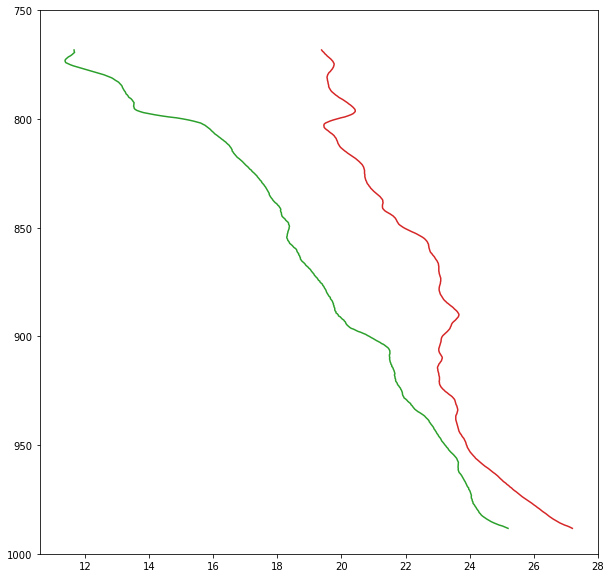

In [52]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot() # establishes a label of 'ax1' for the figure

ax1.plot(skew_vals['T'], skew_vals['p'], color='tab:red')
ax1.plot(skew_vals['Td'], skew_vals['p'], color='tab:green')

ax1.set_ylim(1000, 750) # redoes the y-axis limits


### Plot the Wind Speeds 

Now we make the same plot for wind speeds. First the wind speed needs to be calculated from u and v. Note the syntax used for doing so. Also, the units are changed from 'knots', which seems to be the default within soundings, to 'm/s'. 

(1000.0, 750.0)

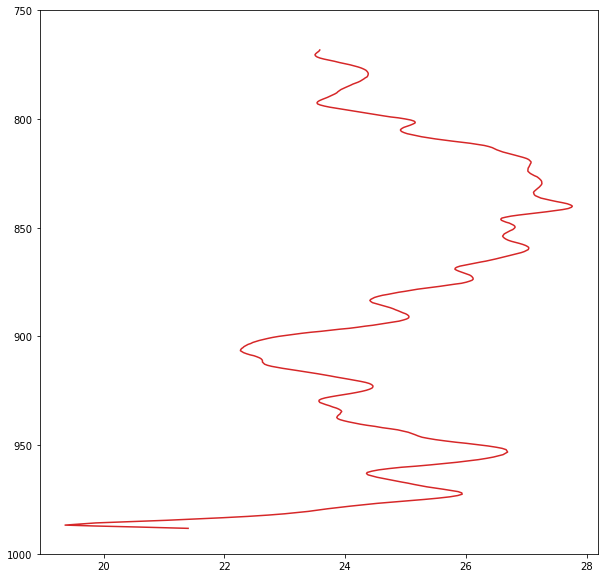

In [56]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot()
wind_speed = (skew_vals['u']**2+skew_vals['v']**2)**(0.5)
ax1.plot(wind_speed, skew_vals['p'], color='tab:red')

ax1.set_ylim(1000, 750)

<a name="skewt"></a>

## Make a Skew-T
the code belows plots the same data but on a skew-t plot

(10.0, 30.0)

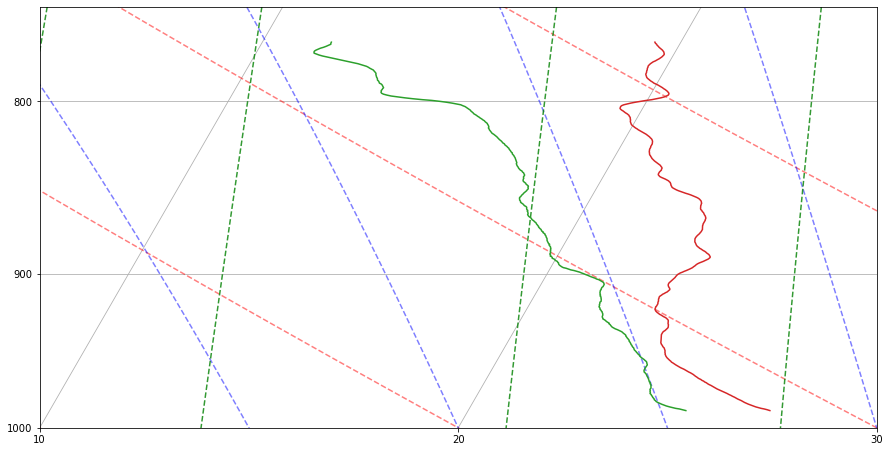

In [63]:
from metpy.plots import SkewT #the magic import call

fig = plt.figure(figsize=(15, 15))
skew = SkewT(fig)

# all of the transforms happen in the background...
skew.plot(skew_vals['p'], skew_vals['T'], color='tab:red')
skew.plot(skew_vals['p'], skew_vals['Td'], color='tab:green')

# Add relevant special lines. you may want to do these one at a time
# to help you see which are which.
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Add wind barbs
#skew.plot_barbs(skew_vals['p'], skew_vals['u'], skew_vals['v'])

# Set some sensible axis limits
skew.ax.set_ylim(1000, 750)
skew.ax.set_xlim(10, 30)

<div class="alert alert-success">
    <b>YOU:</b>:
     <ul>
      <li>Add a green line for dewpoint.</li>
      <li>Set the x-axis limits to something sensible.</li>
    </ul>
</div>